In [11]:
 # Copyright 2024 kairess

 # Licensed under the Apache License, Version 2.0 (the "License");
 # you may not use this file except in compliance with the License.
 # You may obtain a copy of the License at

 #     http://www.apache.org/licenses/LICENSE-2.0

 # Unless required by applicable law or agreed to in writing, software
 # distributed under the License is distributed on an "AS IS" BASIS,
 # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
 # See the License for the specific language governing permissions and
 # limitations under the License.

# https://github.com/kairess/gesture-recognition

import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
actions = [
    'capture',
    'good',
    'okay',
    'back',
    'spin',
    'stop',
    'click',
    'away'
]

data = np.concatenate([
    np.load('dataset/seq_capture_1718716026.npy'),
    np.load('dataset/seq_good_1718716026.npy'),
    np.load('dataset/seq_okay_1718716026.npy'),
    np.load('dataset/seq_back_1718716026.npy'),
    np.load('dataset/seq_spin_1718716026.npy'),
    np.load('dataset/seq_stop_1718716026.npy'),
    np.load('dataset/seq_click_1718716026.npy'),
    np.load('dataset/seq_away_1718716026.npy')
], axis=0)
data.shape

(6965, 30, 100)

In [3]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(6965, 30, 99)
(6965,)


In [4]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(6965, 8)

In [5]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(6268, 30, 99) (6268, 8)
(697, 30, 99) (697, 8)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

c:\Users\SOYUN\miniconda3\envs\oop\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        41,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,328 (173.16 KB)

 Trainable params: 44,328 (173.16 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('./models/model2_1.0.keras', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
186/196 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4645 - loss: 10.8359
Epoch 1: val_acc improved from -inf to 0.80344, saving model to ./models/model2_1.0.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.4742 - loss: 10.5065 - val_acc: 0.8034 - val_loss: 0.7634 - learning_rate: 0.0010
Epoch 2/200
186/196 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8704 - loss: 0.4330
Epoch 2: val_acc improved from 0.80344 to 0.94548, saving model to ./models/model2_1.0.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8720 - loss: 0.4276 - val_acc: 0.9455 - val_loss: 0.2497 - learning_rate: 0.0010
Epoch 3/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9322 - loss: 0.2441
Epoch 3: val_acc did not improve from 0.94548
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9322 - loss: 0.2443 - val_acc: 0.9010 - val_loss: 0.2926 - learning_rate: 0.0010
Epoch 4/200
192/196 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9027 - loss: 0.2837
Epoch 4: val_acc did not improve from 0.94548
19

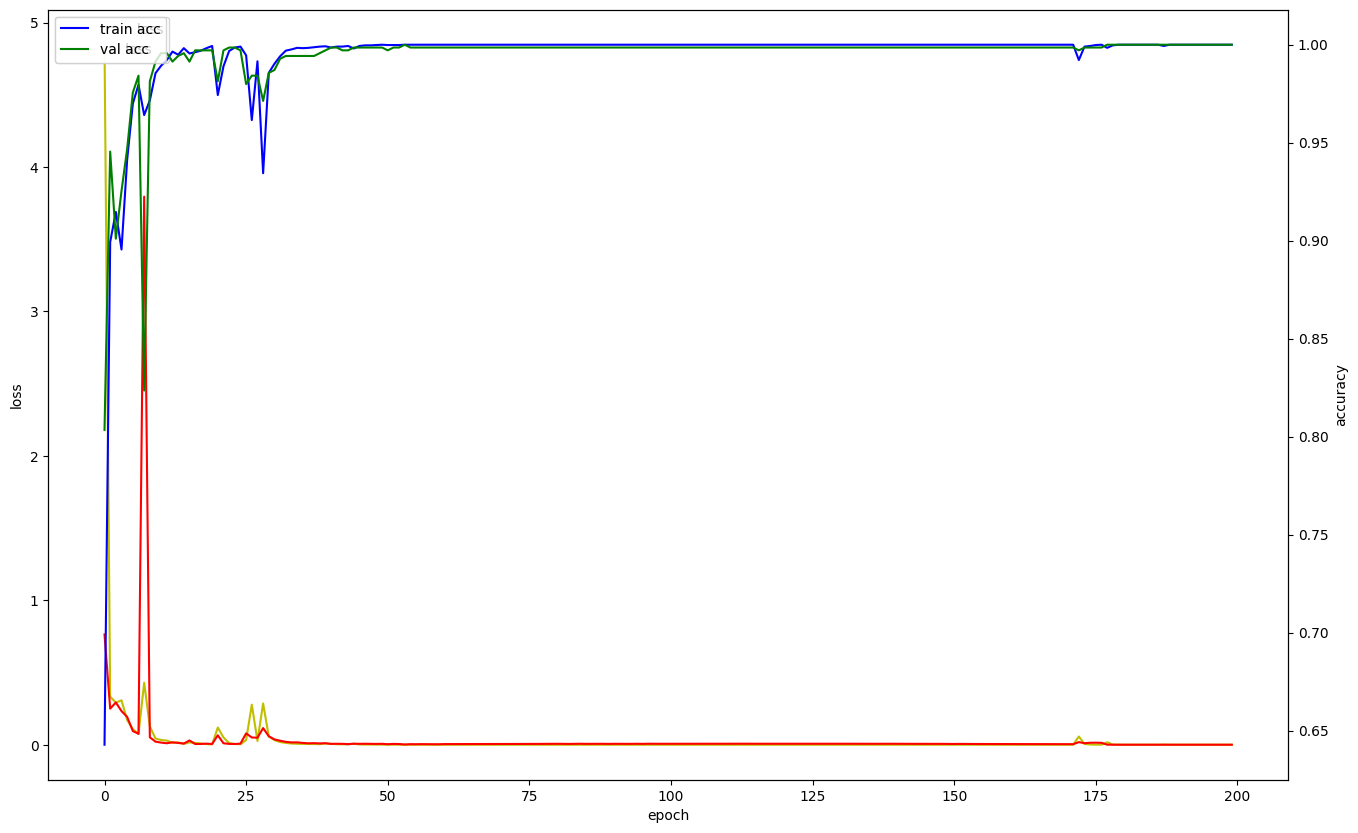

In [8]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [9]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('./models/model2_1.0.keras')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[[609,   0],
        [  0,  88]],

       [[601,   0],
        [  0,  96]],

       [[620,   0],
        [  0,  77]],

       [[605,   0],
        [  0,  92]],

       [[628,   0],
        [  0,  69]],

       [[602,   0],
        [  0,  95]],

       [[608,   0],
        [  0,  89]],

       [[606,   0],
        [  0,  91]]], dtype=int64)

In [10]:
print(y_pred.argmax(axis=1))
# print((y_pred.argmax(axis=1) == y_val).sum())
# print(y_pred.shape)

[7 6 1 6 7 1 0 6 6 4 5 5 4 4 6 3 2 4 4 3 1 6 6 5 5 7 7 1 2 6 0 1 0 6 3 5 5
 5 1 2 3 2 3 1 7 1 1 6 2 0 5 2 6 4 2 2 3 3 4 2 2 3 1 6 5 7 1 1 4 0 7 2 4 5
 7 4 3 3 6 7 5 3 2 3 5 1 7 1 0 0 3 3 7 4 1 0 3 3 0 2 6 4 7 7 2 4 5 1 1 4 7
 1 6 3 2 5 3 3 1 2 1 4 2 7 5 5 3 1 4 6 5 2 6 5 1 5 5 2 6 1 3 0 6 7 6 4 0 0
 6 2 2 4 3 5 5 1 2 4 6 2 6 0 0 0 7 6 2 5 0 0 5 7 5 2 7 6 5 3 7 2 0 5 7 7 3
 7 3 1 1 7 1 6 2 1 1 2 6 3 2 7 3 6 1 3 0 1 4 0 6 4 7 2 0 0 6 0 0 0 6 6 2 0
 1 5 6 5 7 3 3 5 6 7 0 0 3 6 0 0 4 6 7 1 6 2 0 5 3 1 4 3 2 2 4 0 6 4 3 3 5
 4 3 3 3 1 1 6 3 7 3 5 2 2 4 3 4 2 5 1 0 6 1 0 6 1 1 2 2 4 5 6 7 4 1 1 3 4
 1 2 4 0 5 5 6 3 5 6 7 5 4 1 1 6 4 1 6 4 2 3 5 3 2 7 2 5 1 2 5 3 1 4 5 7 4
 2 1 6 5 7 7 7 0 7 5 6 1 1 7 2 7 4 5 0 1 0 4 4 7 2 1 2 4 0 6 3 2 7 0 2 5 7
 0 2 4 6 5 0 0 6 7 7 7 5 5 6 7 4 7 0 0 4 0 2 3 5 7 5 3 6 7 6 2 3 6 7 0 5 5
 1 1 2 1 5 3 1 3 0 1 7 2 5 5 5 0 3 2 7 1 6 7 7 3 3 1 4 0 0 5 1 5 0 3 7 3 7
 4 5 7 0 3 4 0 4 4 3 1 6 1 0 7 1 2 1 0 6 0 7 2 1 5 5 4 0 3 2 5 1 7 5 2 7 1
 5 3 1 5 0 5 0 1 3 3 7 6 